# Crop Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd
data = pd.read_csv('Crop_recommendation_dataset.csv')

## Exploratory Data Analysis

In [3]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [5]:
data.shape

(2200, 8)

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [11]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
crop_summary = pd.pivot_table(data,index=['label'],
                              aggfunc='mean')

In [15]:
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

## Visualizations

### Histograms/Density Plots for Numerical Features

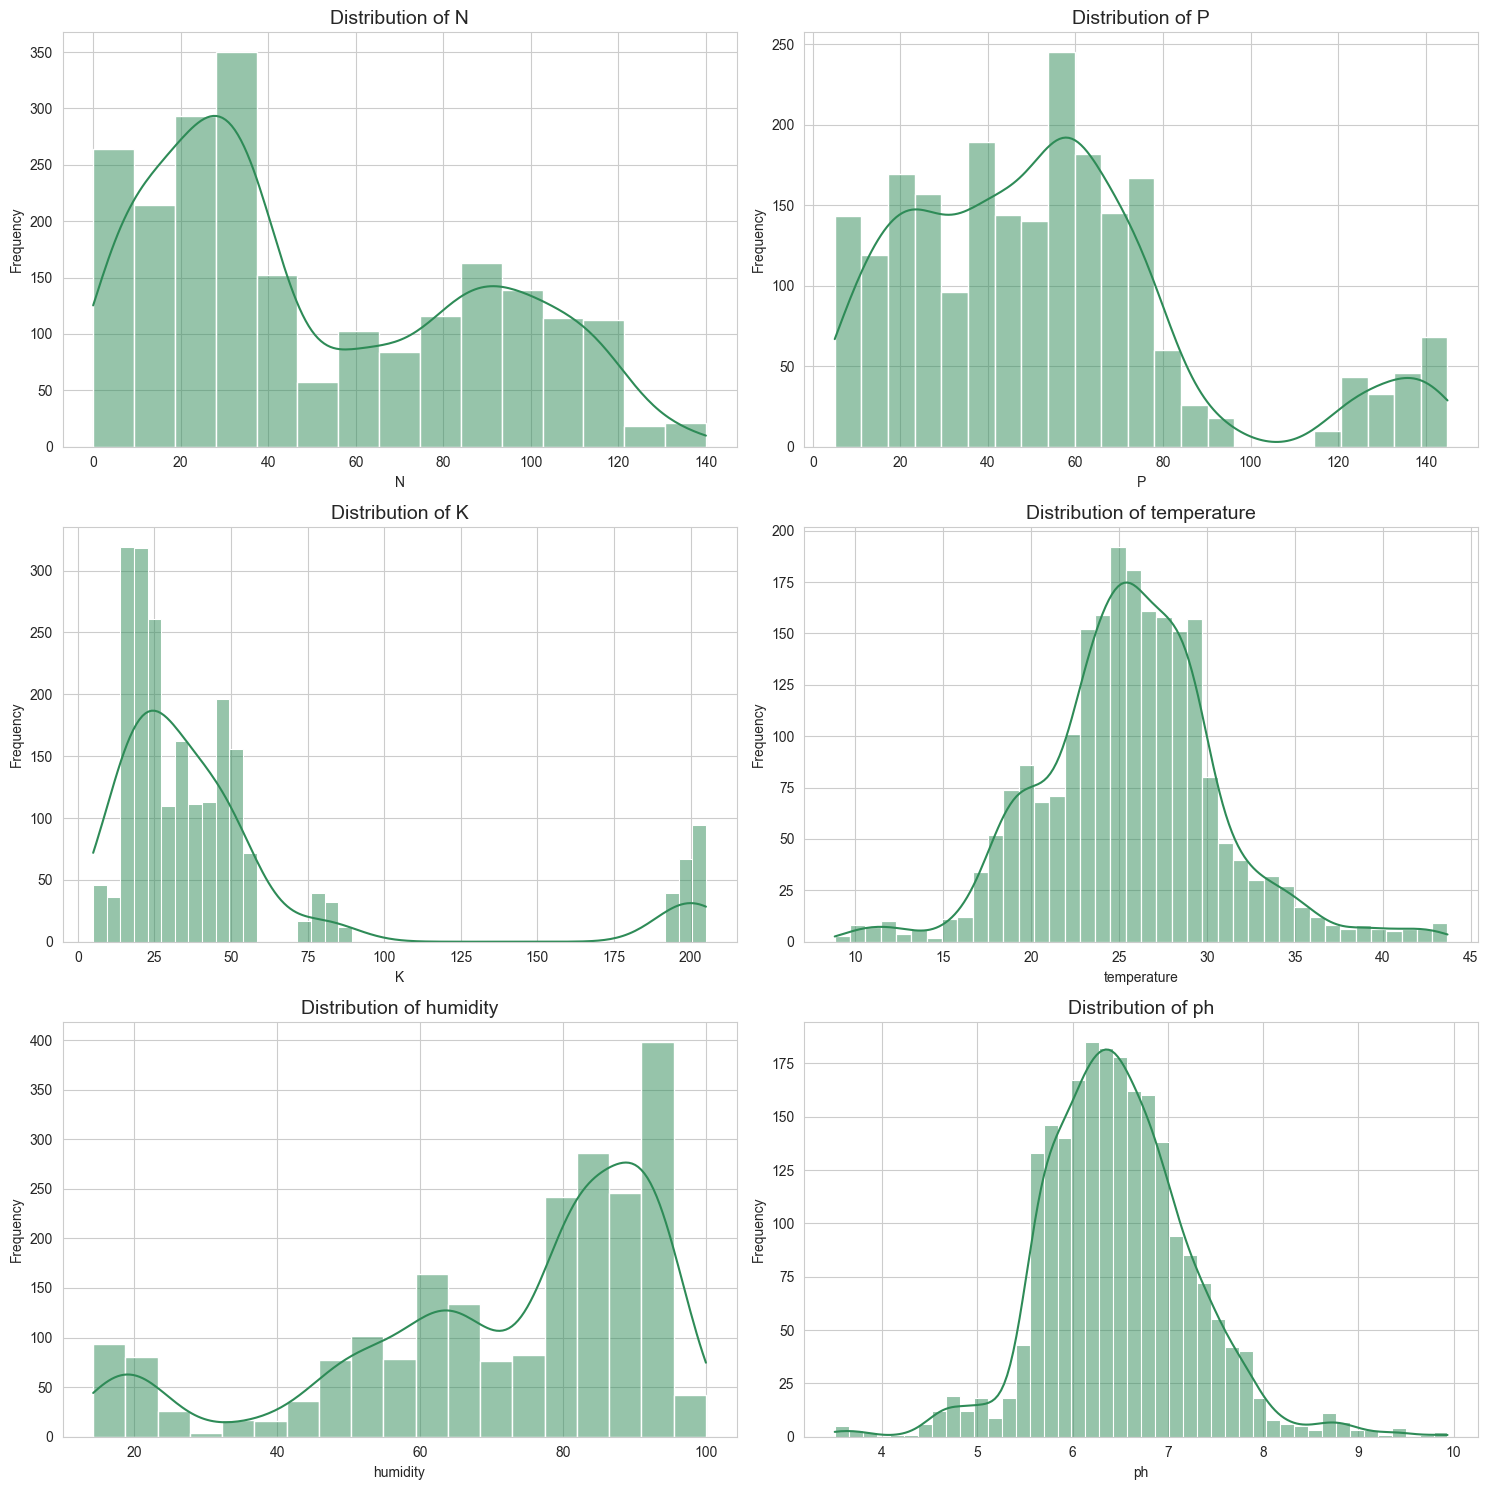

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

crop_data = pd.read_csv('Crop_recommendation_dataset.csv')

sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

num_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

hist_color = '#2E8B57'

for i, ax in enumerate(axes.flatten()):
    if i < len(num_features):
        sns.histplot(crop_data[num_features[i]], kde=True, ax=ax, color=hist_color)
        ax.set_title(f'Distribution of {num_features[i]}', fontsize=14)
        ax.set_xlabel(num_features[i])
        ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

### Boxplots for Numerical Features

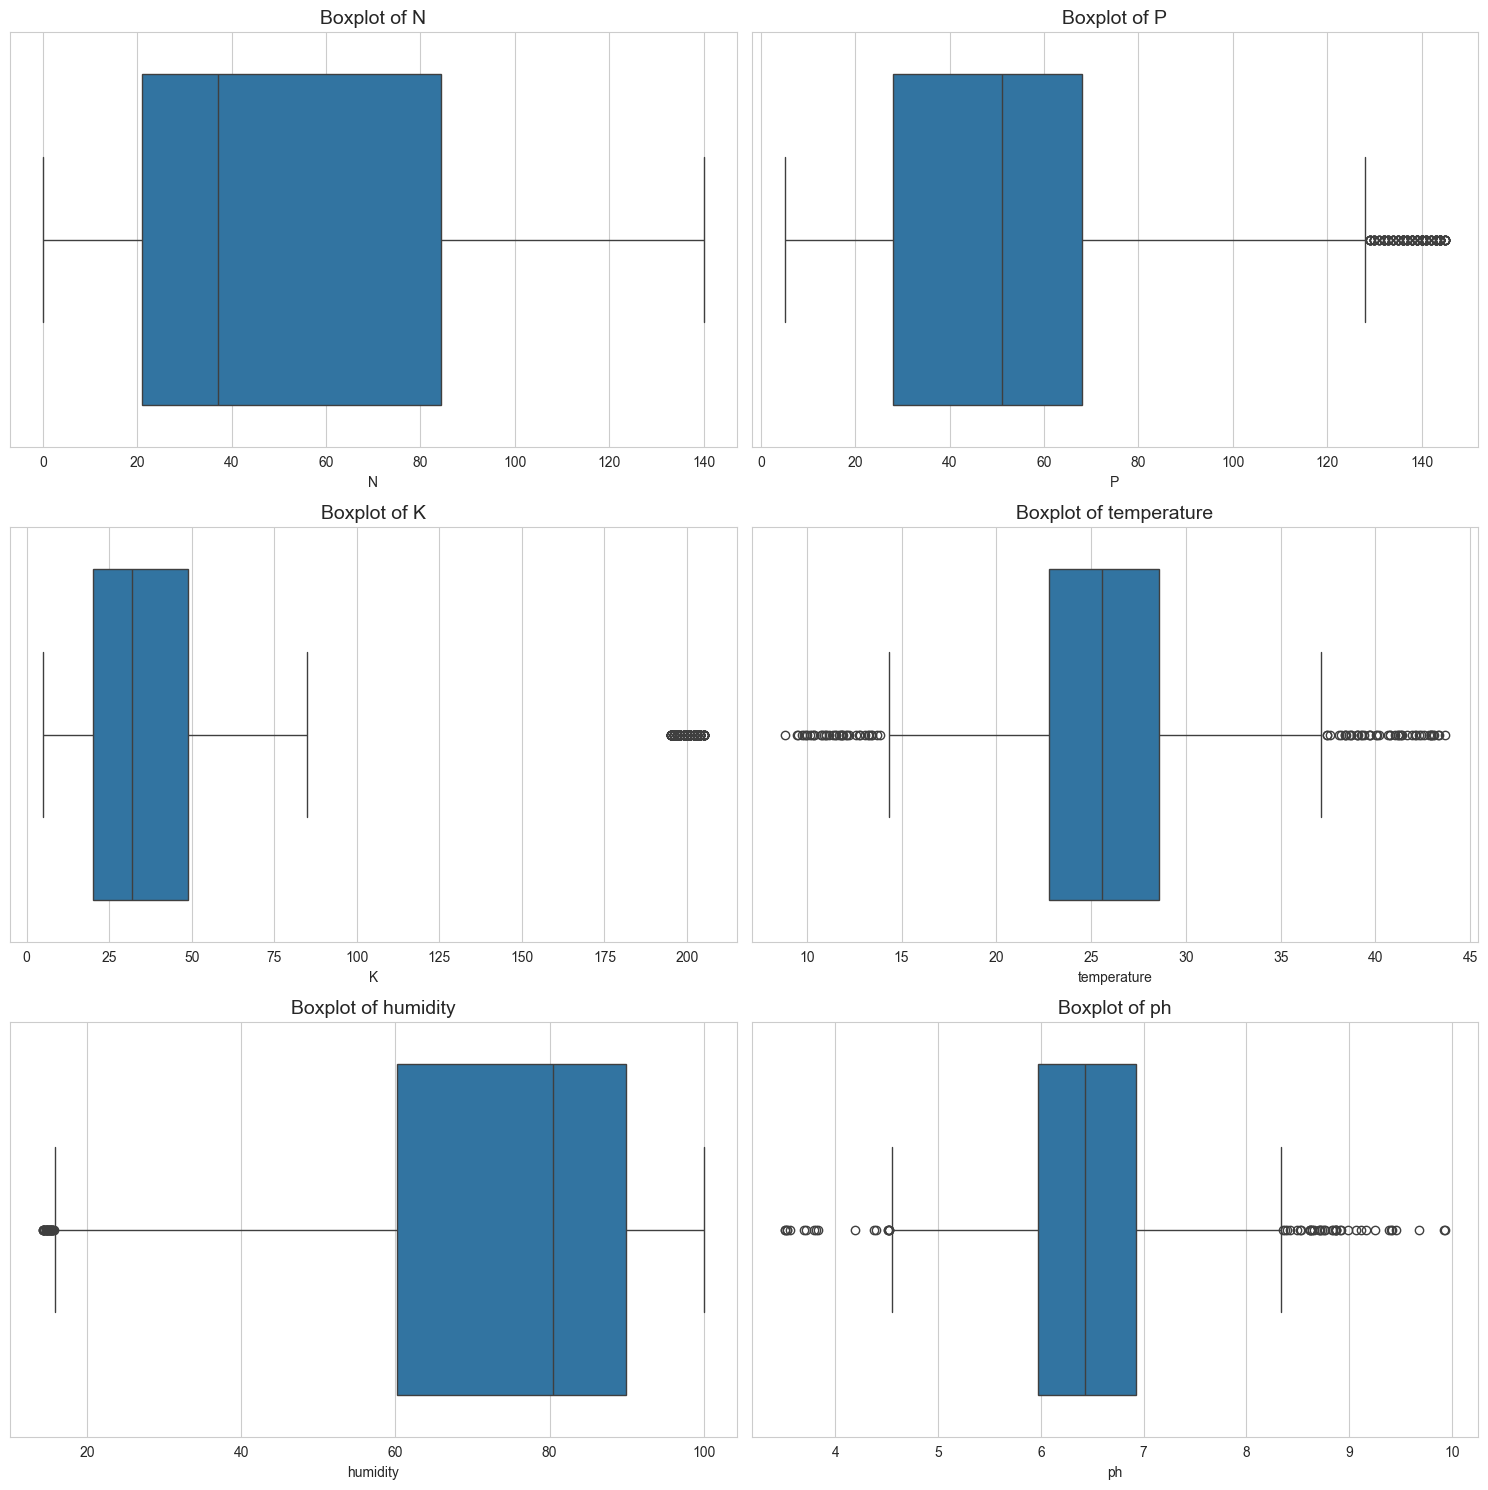

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(num_features):
        sns.boxplot(x=crop_data[num_features[i]], ax=ax)
        ax.set_title(f'Boxplot of {num_features[i]}', fontsize=14)
        ax.set_xlabel(num_features[i])

plt.tight_layout()

plt.show()

### Correlation Heatmap

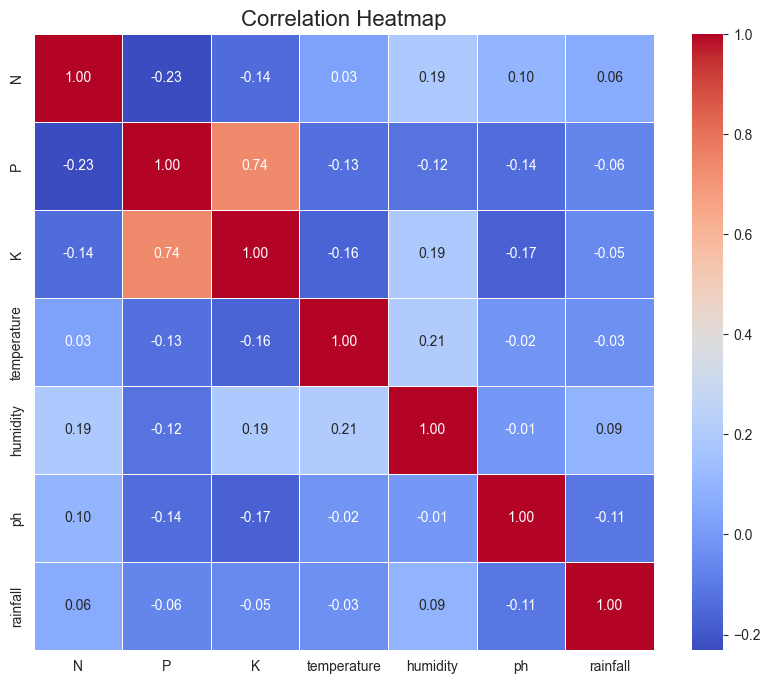

In [18]:
correlation_matrix = crop_data[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Bar Charts for Average Values of Features for Each Crop Type

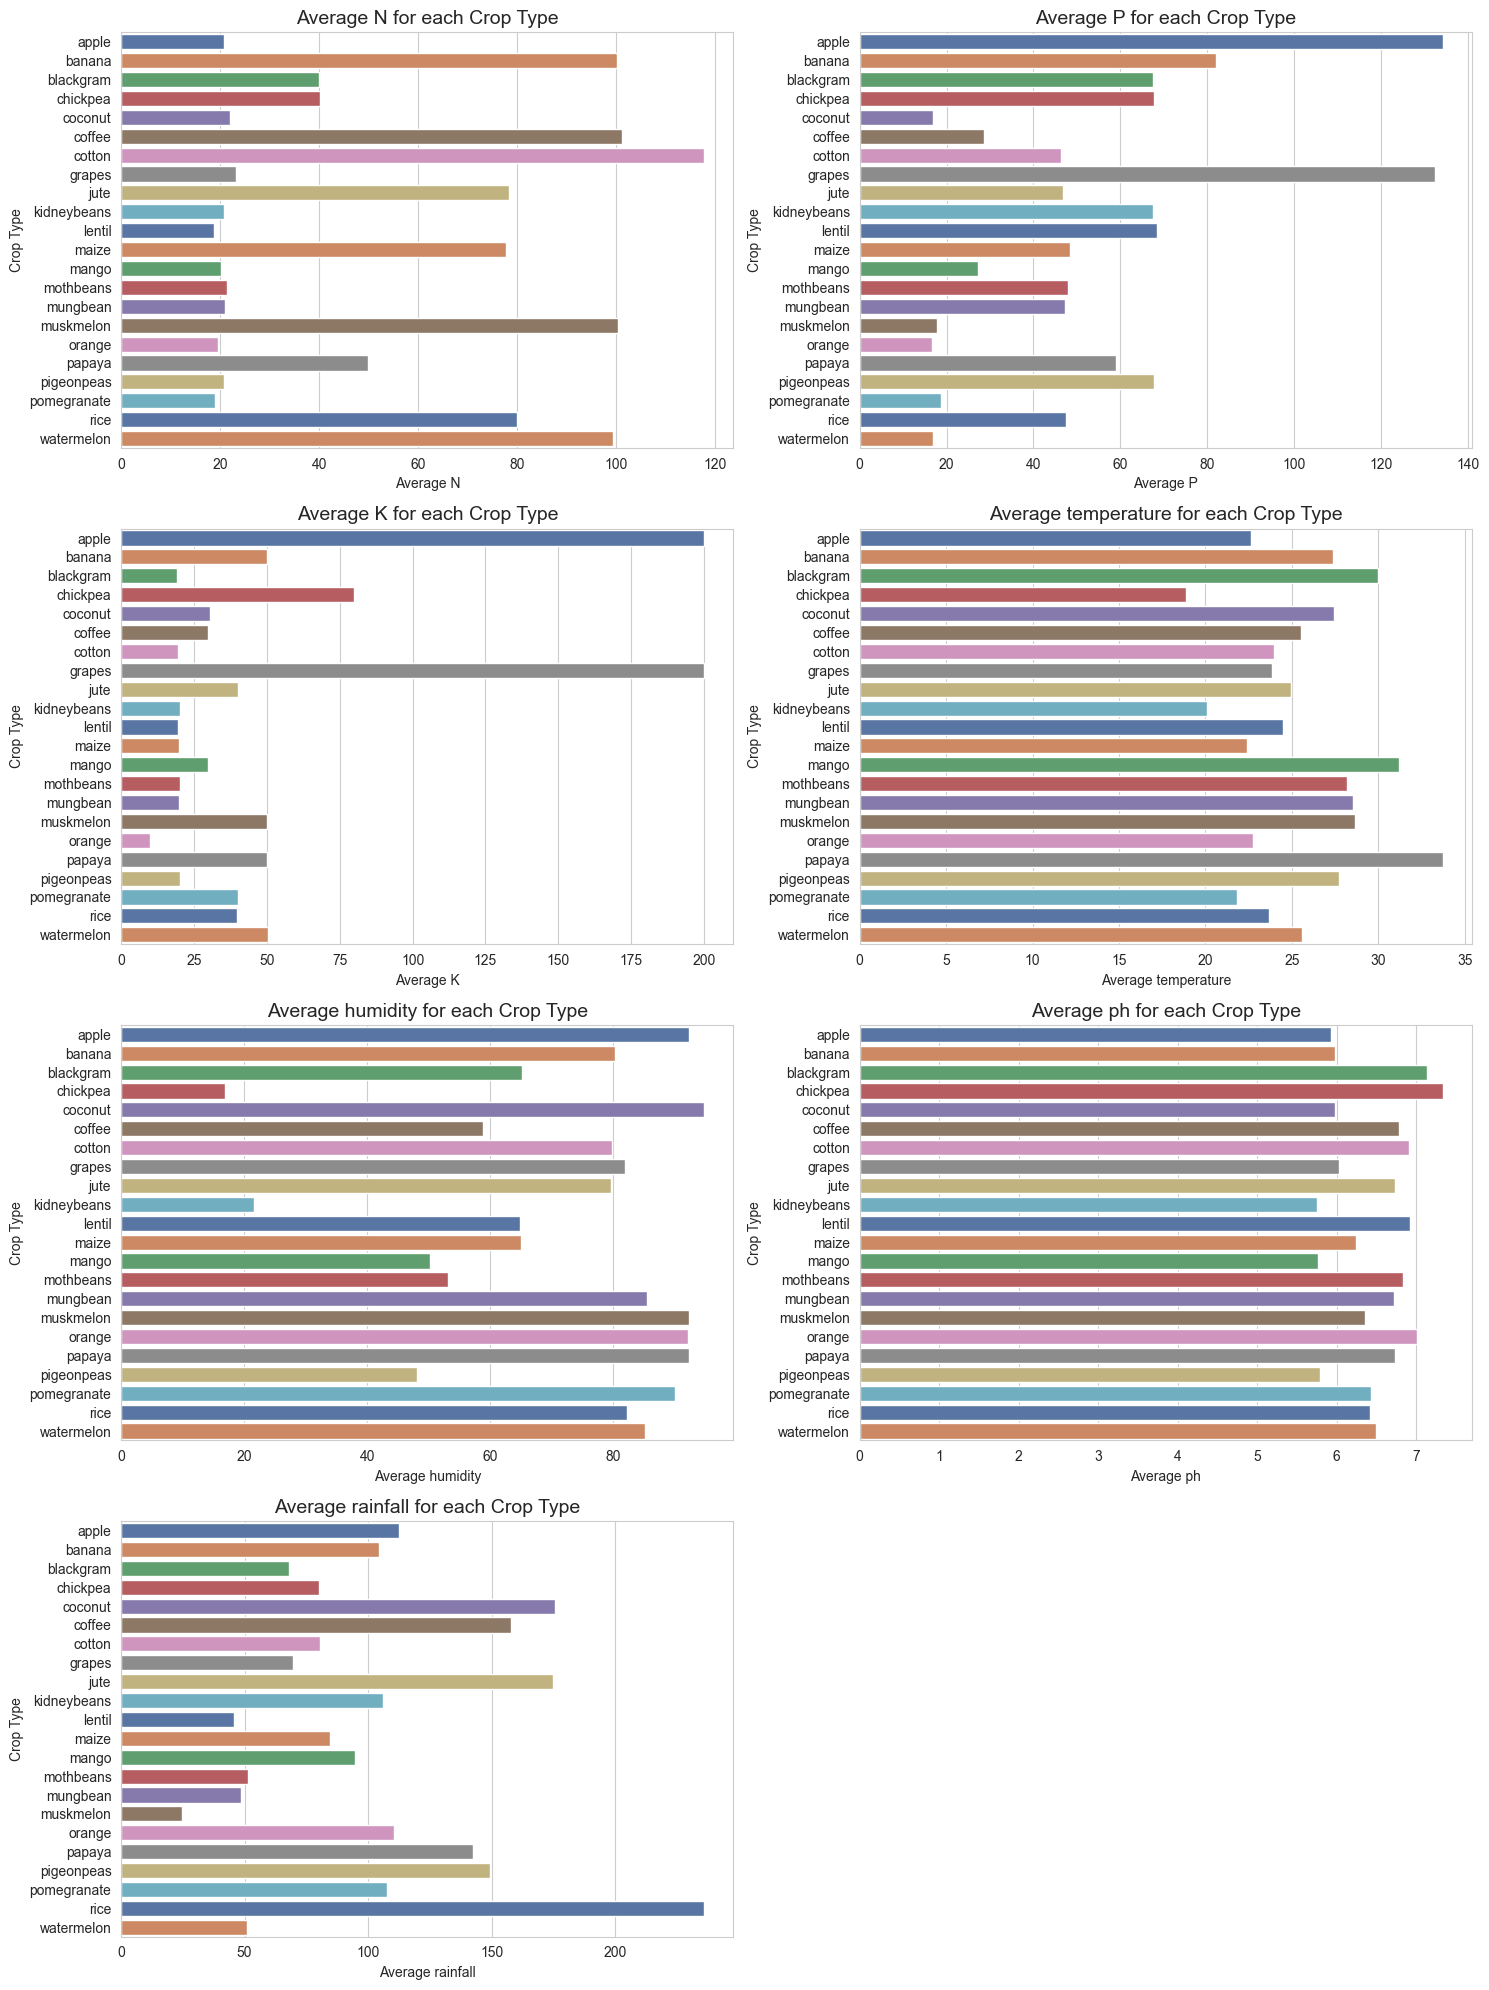

In [19]:
mean_values = crop_data.groupby('label').mean()

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(mean_values.columns):
    sns.barplot(x=mean_values[feature], y=mean_values.index, ax=axes[i], hue=mean_values.index, palette="deep", dodge=False)
    axes[i].set_title(f'Average {feature} for each Crop Type', fontsize=14)
    axes[i].set_xlabel('Average ' + feature)
    axes[i].set_ylabel('Crop Type')

fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

### Scatter Plots for Relationships between Pairs of Variables

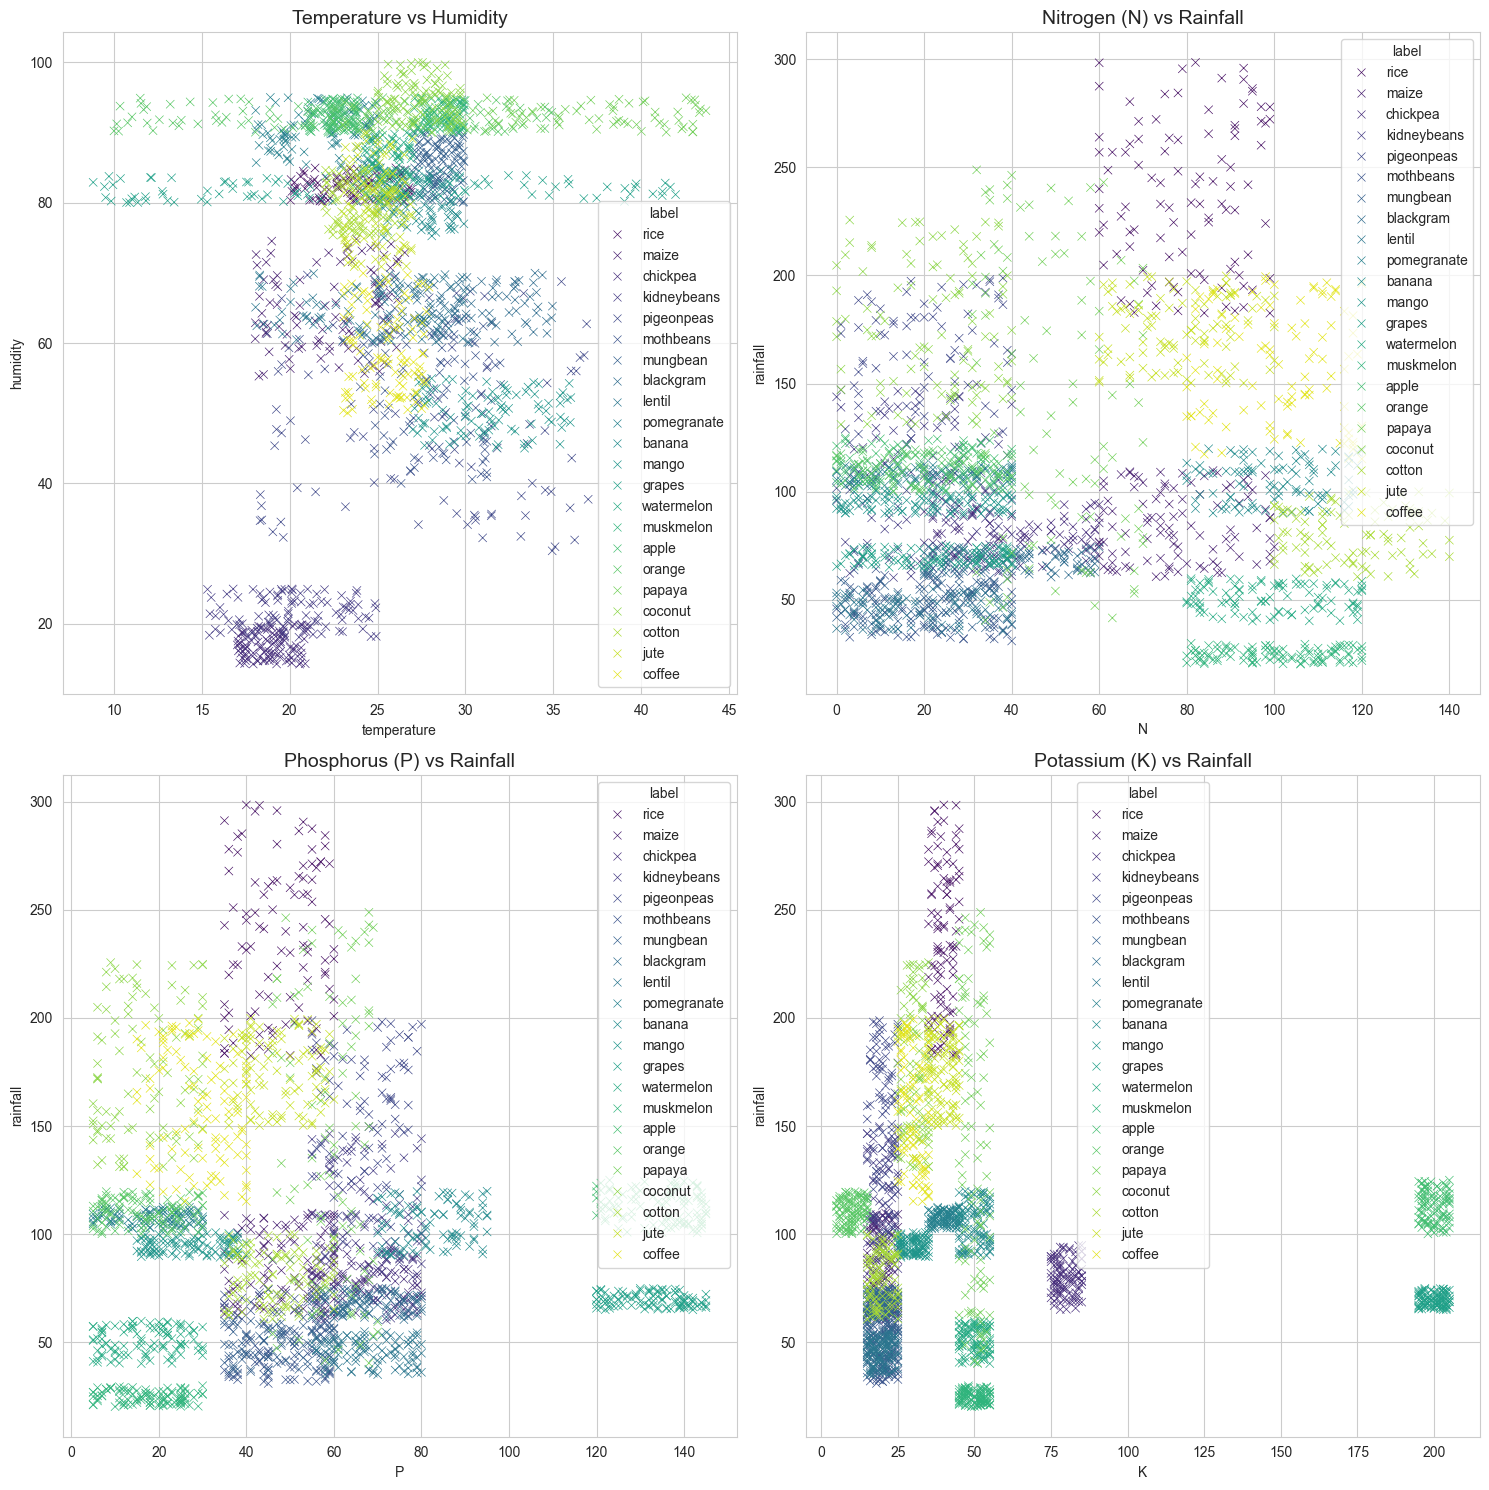

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=crop_data, x='temperature', y='humidity', hue='label', style='label', markers='x', ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Temperature vs Humidity', fontsize=14)

sns.scatterplot(data=crop_data, x='N', y='rainfall', hue='label', style='label', markers='x', ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Nitrogen (N) vs Rainfall', fontsize=14)

sns.scatterplot(data=crop_data, x='P', y='rainfall', hue='label', style='label', markers='x', ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Phosphorus (P) vs Rainfall', fontsize=14)

sns.scatterplot(data=crop_data, x='K', y='rainfall', hue='label', style='label', markers='x', ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Potassium (K) vs Rainfall', fontsize=14)

plt.tight_layout()

plt.show()

In [21]:
crop_summary_new = crop_summary.reset_index()

In [22]:
crop_summary_new

label       K       N       P   humidity        ph    rainfall  \
0         apple  199.89   20.80  134.22  92.333383  5.929663  112.654779   
1        banana   50.05  100.23   82.01  80.358123  5.983893  104.626980   
2     blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
3      chickpea   79.92   40.09   67.79  16.860439  7.336957   80.058977   
4       coconut   30.59   21.98   16.93  94.844272  5.976562  175.686646   
5        coffee   29.94  101.20   28.74  58.869846  6.790308  158.066295   
6        cotton   19.56  117.77   46.24  79.843474  6.912675   80.398043   
7        grapes  200.11   23.18  132.53  81.875228  6.025937   69.611829   
8          jute   39.99   78.40   46.86  79.639864  6.732778  174.792798   
9   kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
10       lentil   19.41   18.77   68.36  64.804785  6.927932   45.680454   
11        maize   19.79   77.76   48.44  65.092249  6.245190   84.766988   
12        mango   29.92   20.07   27.18  50.156573  5.766373   94.704515   
13    mothbeans   20.23   21.44   48.01  53.160418  6.831174   51.198487   
14     mungbean   19.87   20.99   47.28  85.499975  6.723957   48.403601   
15    muskmelon   50.08  100.32   17.72  92.342802  6.358805   24.689952   
16       orange   10.01   19.58   16.55  92.170209  7.016957  110.474969   
17       papaya   50.04   49.88   59.05  92.403388  6.741442  142.627839   
18   pigeonpeas   20.29   20.73   67.73  48.061633  5.794175  149.457564   
19  pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
20         rice   39.87   79.89   47.58  82.272822  6.425471  236.181114   
21   watermelon   50.22   99.42   17.00  85.160375  6.495778   50.786219   

    temperature  
0     22.630942  
1     27.376798  
2     29.973340  
3     18.872847  
4     27.409892  
5     25.540477  
6     23.988958  
7     23.849575  
8     24.958376  
9     20.115085  
10    24.509052  
11    22.389204  
12    31.208770  
13    28.194920  
14    28.525775  
15    28.663066  
16    22.765725  
17    33.723859  
18    27.741762  
19    21.837842  
20    23.689332  
21    25.591767

In [23]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig1 = px.bar(crop_summary_new, x='label', y='N')
fig1.show()

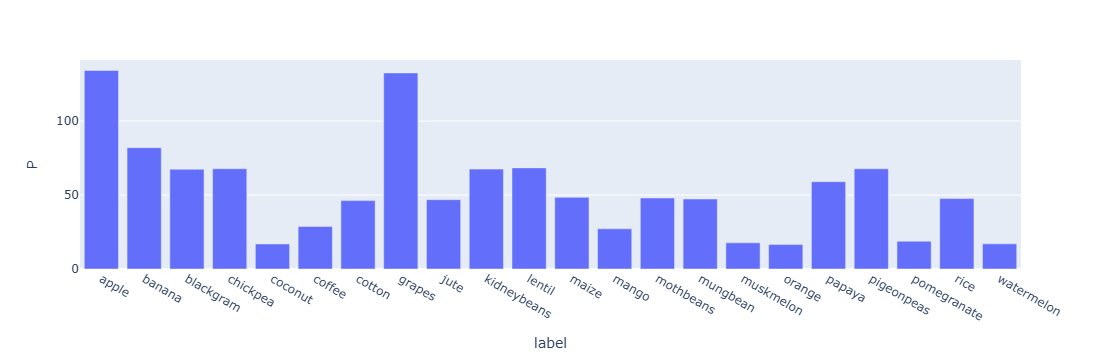

In [24]:
fig2 = px.bar(crop_summary_new, x='label', y='P')
fig2.show()

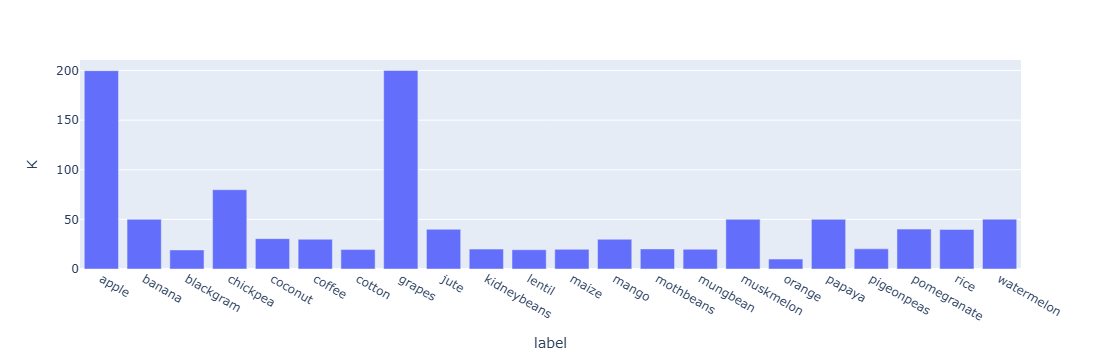

In [25]:
fig3 = px.bar(crop_summary_new, x='label', y='K')
fig3.show()

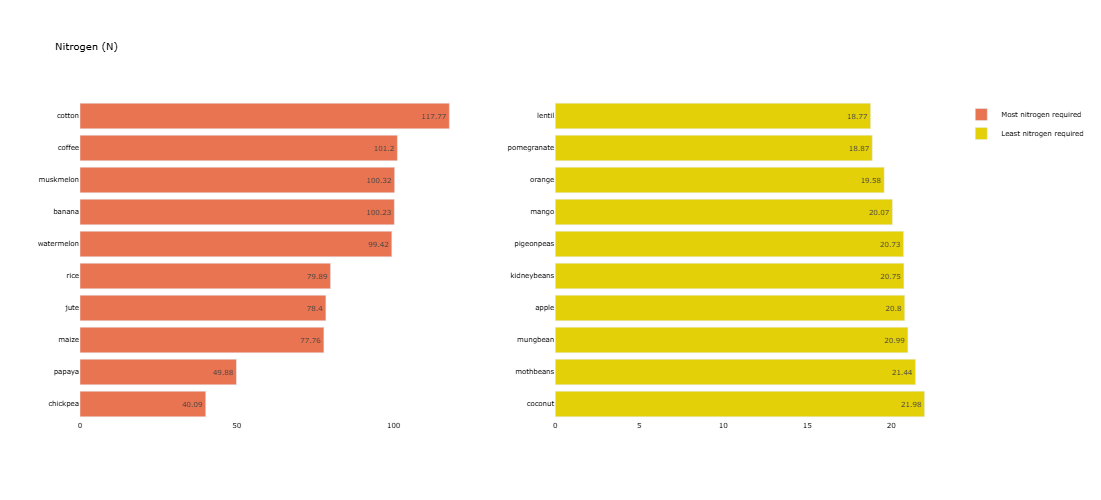

In [26]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

import random

crop_summary_N = crop_summary.sort_values(by='N',
                                          ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [27]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [30]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Individual Algorithms

In [31]:
X = data.drop('label', axis=1)
y = data['label']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

## 1. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=42)
classifier_rf.fit(X_train, y_train)
y_pred= classifier_rf.predict(X_test)

### Accuracy

In [34]:
from sklearn.metrics import accuracy_score
rf_accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9959


### Confusion Matrix

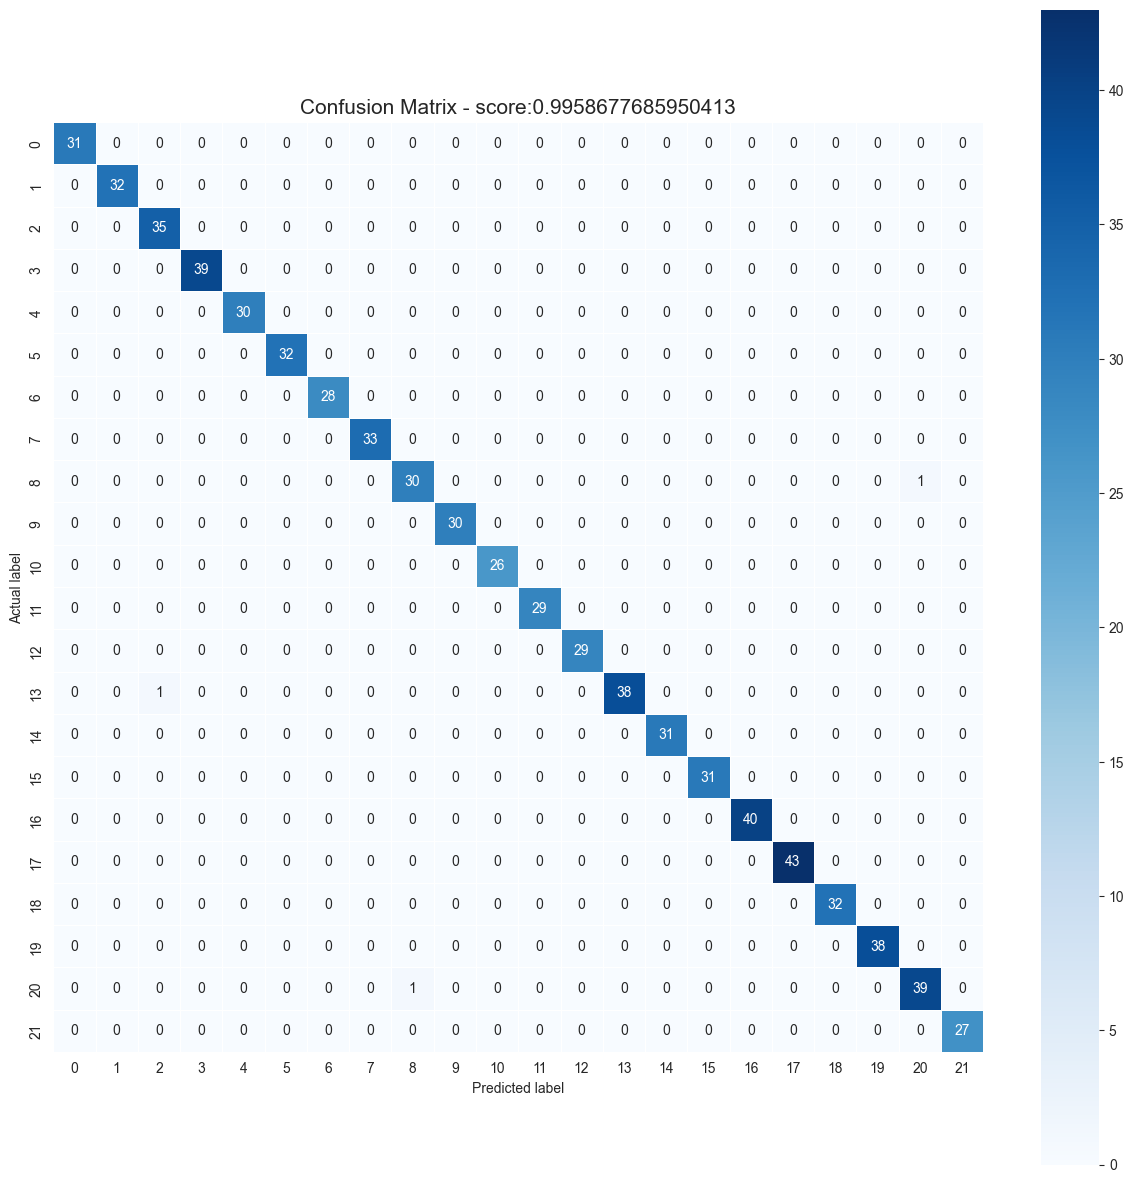

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
cms_rf = (accuracy_score(y_test,y_pred))

### Classification Report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      1.00      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.97      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

## 2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

### Accuracy

In [38]:
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score: 0.9807


### Cofusion Matrix

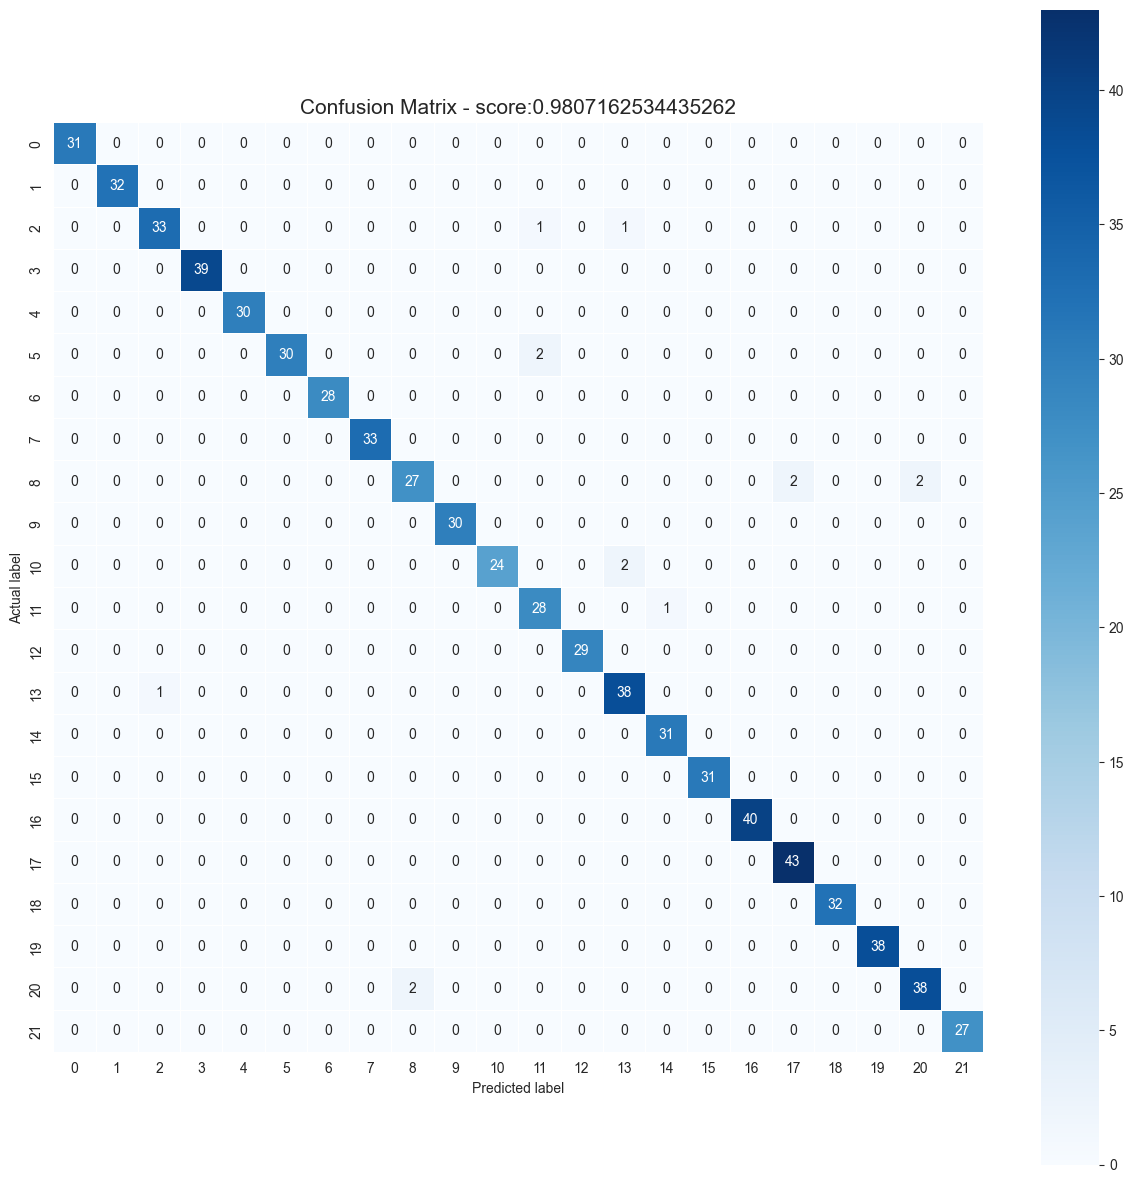

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
cms_dt = (accuracy_score(y_test,y_pred))

### Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.94      0.97        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.90      0.97      0.93        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       0.97      1.00      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

## 3. Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

### Accuracy

In [42]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print('Gradient Boosting Model accuracy score: {0:0.4f}'.format(gb_accuracy))


Gradient Boosting Model accuracy score: 0.9890


### Confusion Matrix

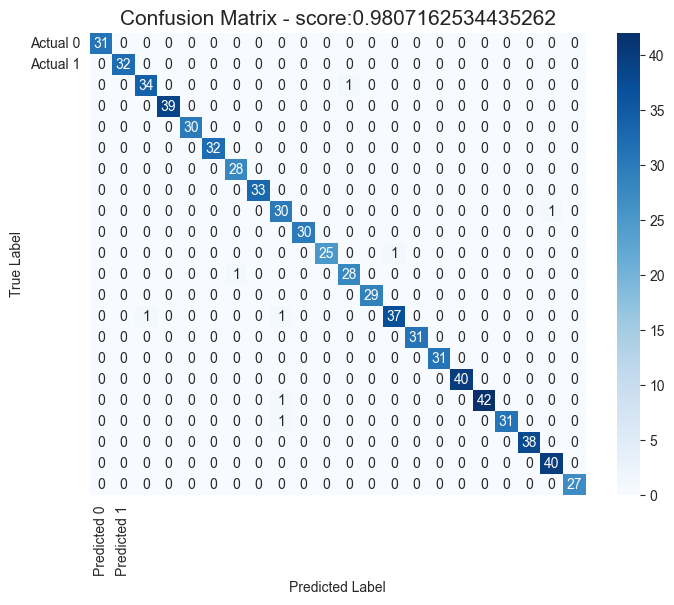

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
cms_gb = (accuracy_score(y_test,y_pred))

### Classification Report

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

report_gb = classification_report(y_test, y_pred_gb)

print('Classification Report - Gradient Boosting Classifier:\n', report_gb)


Classification Report - Gradient Boosting Classifier:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.97      0.97      0.97        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      0.95      0.96        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00   

## 4. SVM

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

classifier_svm = SVC(kernel='linear', C=1.0, random_state=42)  # You can choose a different kernel or tune hyperparameters

classifier_svm.fit(X_train, y_train)


y_pred_svm = classifier_svm.predict(X_test)


### Accuracy

In [46]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print('SVM Model accuracy score: {0:0.4f}'.format(svm_accuracy))

SVM Model accuracy score: 0.9862


### Confusion Matrix

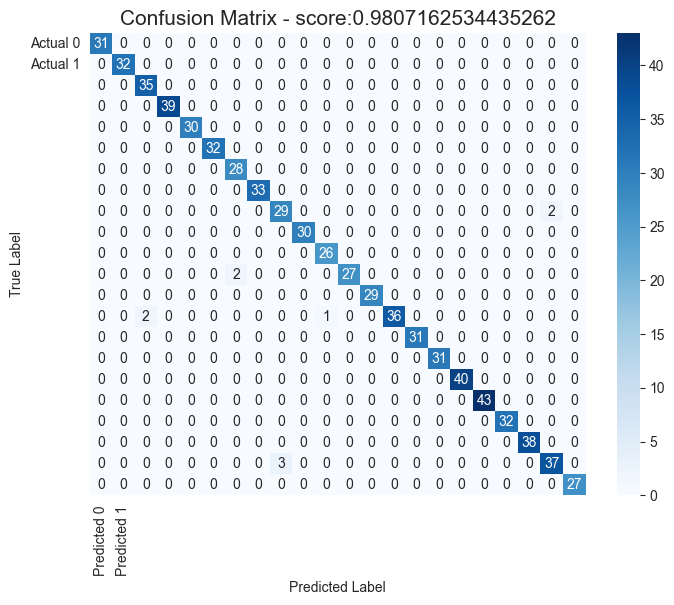

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

classifier_svm = SVC(kernel='linear', C=1.0)

classifier_svm.fit(X_train, y_train)

y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
cms_svm = (accuracy_score(y_test,y_pred))

### Classification Report

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

classifier_svm = SVC(kernel='linear', C=1.0)
classifier_svm.fit(X_train, y_train)

y_pred_svm = classifier_svm.predict(X_test)

report_svm = classification_report(y_test, y_pred_svm)

print('Classification Report - SVM Classifier:\n', report_svm)


Classification Report - SVM Classifier:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.95      1.00      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        33
        jute       0.91      0.94      0.92        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.96      1.00      0.98        26
       maize       1.00      0.93      0.96        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.92      0.96        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1

## 5. KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

### Accuracy

In [50]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print('KNN Model accuracy score: {0:0.4f}'.format(knn_accuracy))

KNN Model accuracy score: 0.9821


### Confusion Matrix

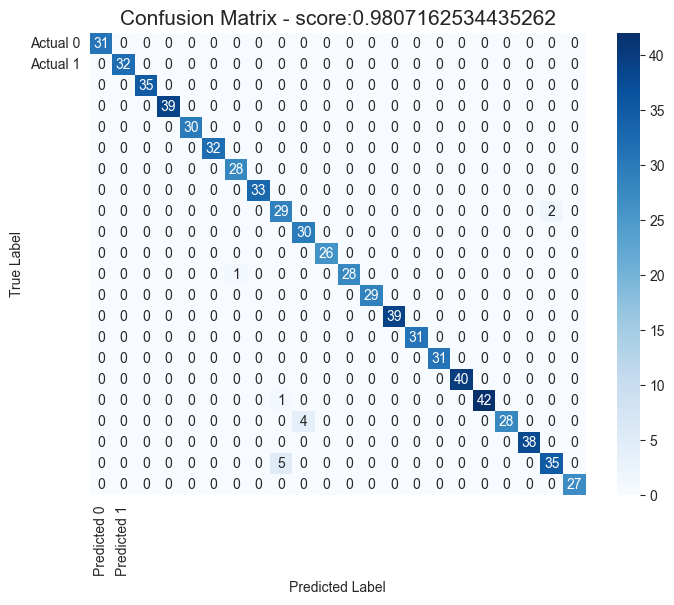

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

plt.show()
cms_knn = (accuracy_score(y_test,y_pred))

### Classification Report

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

report_knn = classification_report(y_test, y_pred_knn)

print('Classification Report - KNN Classifier:\n', report_knn)

Classification Report - KNN Classifier:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.83      0.94      0.88        31
 kidneybeans       0.88      1.00      0.94        30
      lentil       1.00      1.00      1.00        26
       maize       1.00      0.97      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1

## 6. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = classifier_lr.predict(X_test)

### Accuracy

In [55]:
from sklearn.metrics import accuracy_score
lr_accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.9435


### Confusion Matrix

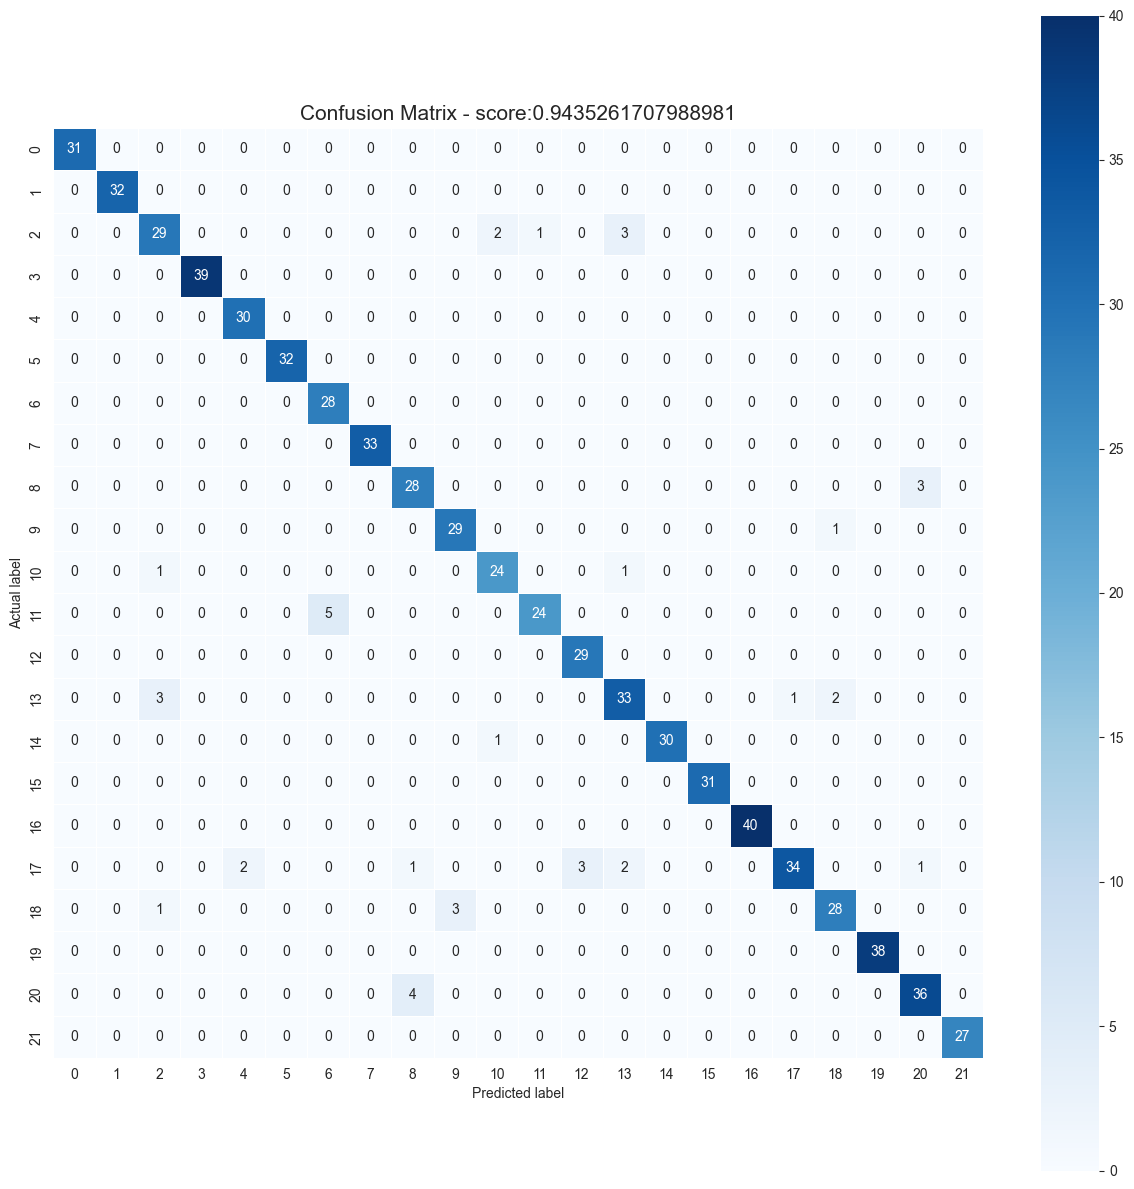

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
cms_lr = (accuracy_score(y_test,y_pred))

### Classification Report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.83      0.84        35
    chickpea       1.00      1.00      1.00        39
     coconut       0.94      1.00      0.97        30
      coffee       1.00      1.00      1.00        32
      cotton       0.85      1.00      0.92        28
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.90      0.88        31
 kidneybeans       0.91      0.97      0.94        30
      lentil       0.89      0.92      0.91        26
       maize       0.96      0.83      0.89        29
       mango       0.91      1.00      0.95        29
   mothbeans       0.85      0.85      0.85        39
    mungbean       1.00      0.97      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.97    

## Ensemble Learning

### EL using three algorithms

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

ensemble_model_3 = VotingClassifier(estimators=[
    ('RandomForest', rf_classifier),
    ('SVM', svm_classifier),
    ('GradientBoosting', gb_classifier)
], voting='hard') 

ensemble_model_3.fit(X_train, y_train)

y_pred_ensemble = ensemble_model_3.predict(X_test)

#### Accuracy

In [59]:
accuracy_ensemble_3 = accuracy_score(y_test, y_pred_ensemble)

print('Ensemble Model accuracy score: {0:0.4f}'.format(accuracy_ensemble_3))

Ensemble Model accuracy score: 0.9959


#### Confusion Matrix

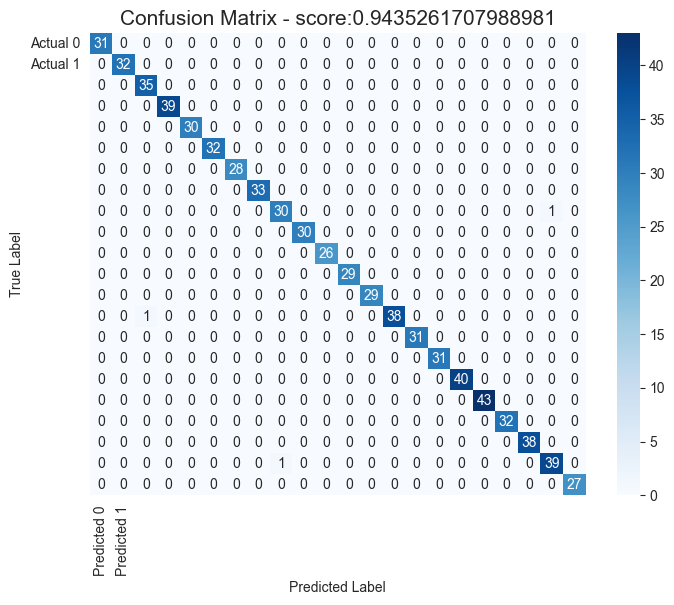

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

plt.show()
cms_ensemble_3 = (accuracy_score(y_test,y_pred))

#### Classification Report

In [61]:
from sklearn.metrics import classification_report

report_ensemble = classification_report(y_test, y_pred_ensemble)

print('Classification Report - Ensemble Model:\n', report_ensemble)

Classification Report - Ensemble Model:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      1.00      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.97      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1

### EL using four algorithms

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

ensemble_model_4 = VotingClassifier(estimators=[
    ('RandomForest', rf_classifier),
    ('SVM', svm_classifier),
    ('GradientBoosting', gb_classifier),
    ('KNN', knn_classifier)
], voting='hard')

ensemble_model_4.fit(X_train, y_train)

y_pred_ensemble = ensemble_model_4.predict(X_test)

#### Accuracy

In [63]:
accuracy_ensemble_4 = accuracy_score(y_test, y_pred_ensemble)

print('Ensemble Model accuracy score: {0:0.4f}'.format(accuracy_ensemble_4))

Ensemble Model accuracy score: 0.9945


#### Confusion Matrix

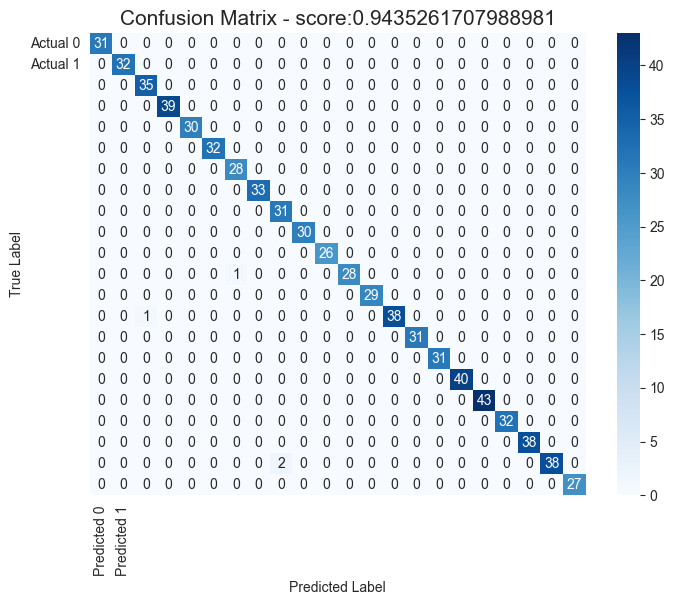

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

plt.show()
cms_ensemble_4 = (accuracy_score(y_test,y_pred))

#### Classification Report

In [65]:
from sklearn.metrics import classification_report

report_ensemble = classification_report(y_test, y_pred_ensemble)

print('Classification Report - Ensemble Model:\n', report_ensemble)

Classification Report - Ensemble Model:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      1.00      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.94      1.00      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        26
       maize       1.00      0.97      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.97      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1

## Visualizations for Algorithm Comparison

In [66]:
import plotly.graph_objects as go
import plotly.express as px

model_names = ['Random Forest','Decision Tree', 'Gradient Boosting', 
               'SVM', 'KNN', 'Logistic Regression', 'Ensemble Model 1', 
               'Ensemble Model 2',]
model_accuracies = [rf_accuracy * 100,dt_accuracy * 100, gb_accuracy * 100, svm_accuracy * 100, 
                    knn_accuracy * 100, lr_accuracy * 100, accuracy_ensemble_3 * 100, accuracy_ensemble_4 * 100]

color_scale = px.colors.sequential.Viridis

fig = go.Figure([go.Bar(x=model_names, y=model_accuracies,  # Swap x and y
                        marker=dict(color=model_accuracies, colorscale=color_scale))])

fig.update_layout(
    title='Comparison of ML Models (Accuracy %)',
    xaxis_title='Model',
    yaxis_title='Accuracy (%)',
    yaxis=dict(range=[min(model_accuracies) - 1, max(model_accuracies) + 1]),  # Adjust y-axis range
    template='plotly_white')
fig.show()


In [67]:
data = {
    'Model': ['Random Forest','Decision Tree', 'Gradient Boosting', 'SVM', 'KNN', 
              'Logistic Regression', 'Ensemble Model 1', 'Ensemble Model 2'],
    'Accuracy': [round((rf_accuracy * 100),2),round((dt_accuracy * 100),2), round((gb_accuracy * 100),2), 
                    round((svm_accuracy * 100),2), round((knn_accuracy * 100),2), round((lr_accuracy * 100),2), round((accuracy_ensemble_3 * 100),2),
                    round((accuracy_ensemble_4 * 100),2)],
    'Precision':[1,0.98, 0.99, 0.99, 0.98, 0.95, 1.00, 0.99],
    'Recall': [1,0.98, 0.99, 0.99, 0.98, 0.94, 1.00, 0.99],
    'F1-Score': [1,0.98, 0.99, 0.99, 0.98, 0.94, 1.00, 0.99]
}

performance_df = pd.DataFrame(data)

performance_df

Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest     99.59       1.00    1.00      1.00
1        Decision Tree     98.07       0.98    0.98      0.98
2    Gradient Boosting     98.90       0.99    0.99      0.99
3                  SVM     98.62       0.99    0.99      0.99
4                  KNN     98.21       0.98    0.98      0.98
5  Logistic Regression     94.35       0.95    0.94      0.94
6     Ensemble Model 1     99.59       1.00    1.00      1.00
7     Ensemble Model 2     99.45       0.99    0.99      0.99

In [68]:
import pandas as pd

model_names = ['Random Forest','Decision Tree', 'Gradient Boosting', 'SVM', 'KNN', 
              'Logistic Regression', 'Ensemble Model 1', 'Ensemble Model 2']

confusion_matrix_scores = [round(cms_rf, 6),round(cms_dt,6), round(cms_gb,6), round(cms_svm,6), round(cms_knn,6),
                           round(cms_lr,6), round(cms_ensemble_3,6), round(cms_ensemble_4,6)]
performance_df = pd.DataFrame({
    'Model': model_names,
    'Confusion Matrix Score': confusion_matrix_scores
})

performance_df

Model  Confusion Matrix Score
0        Random Forest                0.995868
1        Decision Tree                0.980716
2    Gradient Boosting                0.980716
3                  SVM                0.980716
4                  KNN                0.980716
5  Logistic Regression                0.943526
6     Ensemble Model 1                0.943526
7     Ensemble Model 2                0.943526

## Prediction

### Predictions Using Ensemble Model using 4 Algorithms

In [69]:
n = 80
p = 50
k = 35
temperature = 24.5
humidity = 78.0
ph = 6.8
rainfall = 200.0

In [70]:
new_data_point = {
    'N': [n],
    'P': [p],
    'K': [k],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
}

In [71]:
new_data = pd.DataFrame(new_data_point)

In [72]:
ensemble_prediction = ensemble_model_4.predict(new_data)

In [73]:
print(f'Predicted Crop: {ensemble_prediction[0]}')

Predicted Crop: jute


In [74]:
n = 220
p = 110
k = 95
temperature = 24.5
humidity = 90.0
ph = 7
rainfall = 250.0

In [75]:
new_data_point = {
    'N': [n],
    'P': [p],
    'K': [k],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
}

In [76]:
new_data = pd.DataFrame(new_data_point)

In [77]:
ensemble_prediction = ensemble_model_4.predict(new_data)

In [78]:
print(f'Predicted Crop: {ensemble_prediction[0]}')

Predicted Crop: rice


## Predictions Using Ensemble Model using 3 Algorithms

In [79]:
n = 80
p = 50
k = 35
temperature = 24.5
humidity = 78.0
ph = 6.8
rainfall = 200.0

In [80]:
new_data_point = {
    'N': [n],
    'P': [p],
    'K': [k],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
}

In [81]:
new_data = pd.DataFrame(new_data_point)

In [82]:
ensemble_prediction = ensemble_model_3.predict(new_data)

In [83]:
print(f'Predicted Crop: {ensemble_prediction[0]}')

Predicted Crop: jute


In [84]:
n = 220
p = 110
k = 95
temperature = 24.5
humidity = 90.0
ph = 7
rainfall = 250.0

In [85]:
new_data_point = {
    'N': [n],
    'P': [p],
    'K': [k],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
}

In [86]:
ensemble_prediction = ensemble_model_3.predict(new_data)

In [87]:
new_data = pd.DataFrame(new_data_point)

In [88]:
print(f'Predicted Crop: {ensemble_prediction[0]}')

Predicted Crop: jute
